# Transduction (sequence-to-sequence model)

In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

from reservoirpy.datasets import japanese_vowels
from reservoirpy import set_seed, verbosity
from reservoirpy.observables import nrmse, rsquare

from sklearn.metrics import accuracy_score

set_seed(42)
verbosity(0)

0

In [2]:
X_train, Y_train, X_test, Y_test = japanese_vowels()

In [3]:
len(X_train), X_train[0], X_train[0].shape, X_train[0][0], X_train[0][0].shape, X_train[0][0][0], type(X_train[0][0][0])

(270,
 array([[ 1.860936, -0.207383,  0.261557, -0.214562, -0.171253, -0.118167,
         -0.277557,  0.025668,  0.126701, -0.306756, -0.213076,  0.088728],
        [ 1.891651, -0.193249,  0.235363, -0.249118, -0.11289 , -0.112238,
         -0.311997, -0.027122,  0.171457, -0.289431, -0.247722,  0.093011],
        [ 1.939205, -0.239664,  0.258561, -0.291458, -0.041053, -0.102034,
         -0.3833  ,  0.019013,  0.16951 , -0.314894, -0.227908,  0.074638],
        [ 1.717517, -0.218572,  0.217119, -0.228186, -0.018608, -0.137624,
         -0.403318, -0.009643,  0.164607, -0.323267, -0.210105,  0.098098],
        [ 1.741191, -0.279891,  0.196583, -0.236377, -0.032012, -0.090612,
         -0.363134, -0.012571,  0.124298, -0.351171, -0.216545,  0.113899],
        [ 1.684695, -0.311977,  0.195453, -0.23197 , -0.06867 , -0.003822,
         -0.34194 , -0.008826,  0.085097, -0.364329, -0.204794,  0.101838],
        [ 1.637373, -0.336227,  0.152766, -0.223842, -0.026278, -0.009157,
         -0.3

In [4]:
len(X_train), X_train[0].shape, X_train[1].shape

(270, (20, 12), (26, 12))

In [5]:
len(X_train), X_train[0].T.shape, X_train[1].T.shape

(270, (12, 20), (12, 26))

In [6]:
len(Y_train), Y_train[0].shape, Y_train[1].shape

(270, (1, 9), (1, 9))

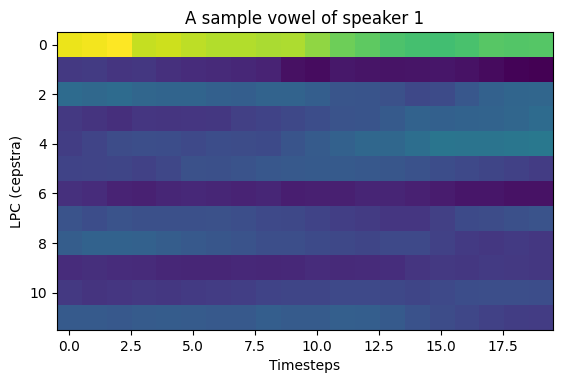

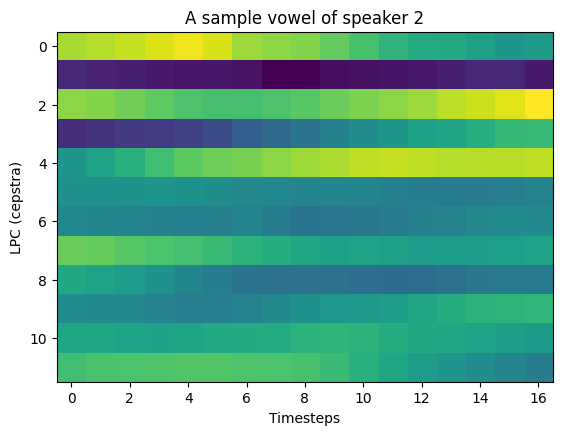

In [7]:
plt.imshow(X_train[0].T)
plt.title(f"A sample vowel of speaker {np.argmax(Y_train[0]) +1}")
plt.xlabel("Timesteps")
plt.ylabel("LPC (cepstra)")
plt.show()

plt.imshow(X_train[50].T)
plt.title(f"A sample vowel of speaker {np.argmax(Y_train[50]) +1}")
plt.xlabel("Timesteps")
plt.ylabel("LPC (cepstra)")
plt.show()

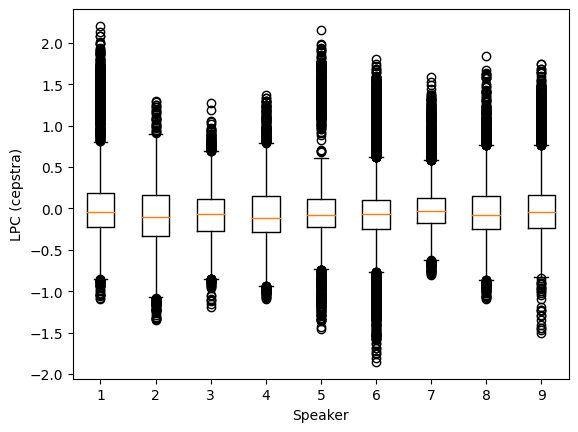

In [8]:
sample_per_speaker = 30
n_speaker = 9
X_train_per_speaker = []

for i in range(n_speaker):
    X_speaker = X_train[i*sample_per_speaker: (i+1)*sample_per_speaker]
    X_train_per_speaker.append(np.concatenate(X_speaker).flatten())

plt.boxplot(X_train_per_speaker)
plt.xlabel("Speaker")
plt.ylabel("LPC (cepstra)")
plt.show()

In [9]:
# repeat_target ensure that we obtain one label per timestep, and not one label per utterance.
X_train, Y_train, X_test, Y_test = japanese_vowels(repeat_targets=True)

In [10]:
len(X_train), X_train[0], X_train[0].shape, X_train[0][0], X_train[0][0].shape, X_train[0][0][0], type(X_train[0][0][0])

(270,
 array([[ 1.860936, -0.207383,  0.261557, -0.214562, -0.171253, -0.118167,
         -0.277557,  0.025668,  0.126701, -0.306756, -0.213076,  0.088728],
        [ 1.891651, -0.193249,  0.235363, -0.249118, -0.11289 , -0.112238,
         -0.311997, -0.027122,  0.171457, -0.289431, -0.247722,  0.093011],
        [ 1.939205, -0.239664,  0.258561, -0.291458, -0.041053, -0.102034,
         -0.3833  ,  0.019013,  0.16951 , -0.314894, -0.227908,  0.074638],
        [ 1.717517, -0.218572,  0.217119, -0.228186, -0.018608, -0.137624,
         -0.403318, -0.009643,  0.164607, -0.323267, -0.210105,  0.098098],
        [ 1.741191, -0.279891,  0.196583, -0.236377, -0.032012, -0.090612,
         -0.363134, -0.012571,  0.124298, -0.351171, -0.216545,  0.113899],
        [ 1.684695, -0.311977,  0.195453, -0.23197 , -0.06867 , -0.003822,
         -0.34194 , -0.008826,  0.085097, -0.364329, -0.204794,  0.101838],
        [ 1.637373, -0.336227,  0.152766, -0.223842, -0.026278, -0.009157,
         -0.3

In [11]:
len(Y_train), Y_train[0], Y_train[0].shape, Y_train[0][0], Y_train[0][0].shape, Y_train[0][0][0], type(Y_train[0][0][0])

(270,
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 (20, 9),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (9,),
 1.0,
 nu

In [18]:
Y_train

[array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.,

In [16]:
Y_train[-1], X_train[-1]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 array([[ 1.240598, -0.352572,  0.202753, -0.819913, -0.0385  , -0.385671,
         -0.021062,  0.434753, -0.200198, -0.184956,  0.050853,  0.061848],
        [ 1.227252, -0.313229,  0.18586 , -0.916691, -0.024352, -0.39582 ,
         -0.028499,  0.442761, -0.175446, -0.165696,  0.032784,  0.076978],
        [ 1.228334, -0.328534,  0.355018, -0.754335,  0.075544, -0.305401,
          0.023347,  0.425791, -0.197482, -0.184463,  0.024559,  0.125767],
        [ 1.074871, -0.543987,  0.347815, -0.652068,  0.28481 , -0.164443,
          0.056965,  0.423496, -0.167755, -0.188309, -0.

In [14]:
X_train[0].shape, Y_train[0].shape

((20, 12), (20, 9))

In [ ]:
from reservoirpy.nodes import Reservoir, Ridge, Input

In [ ]:
source = Input()
reservoir = Reservoir(500, sr=0.9, lr=0.1)
readout = Ridge(ridge=1e-6)

model = [source >> reservoir, source] >> readout

In [ ]:
Y_pred = model.fit(X_train, Y_train, stateful=False, warmup=2).run(X_test, stateful=False)

In [ ]:
Y_pred_class = [np.argmax(y_p, axis=1) for y_p in Y_pred]
Y_test_class = [np.argmax(y_t, axis=1) for y_t in Y_test]

score = accuracy_score(np.concatenate(Y_test_class, axis=0), np.concatenate(Y_pred_class, axis=0))

print("Accuracy: ", f"{score * 100:.3f} %")

# Classification (sequence-to-vector model)

In [19]:
X_train, Y_train, X_test, Y_test = japanese_vowels()

In [ ]:
from reservoirpy.nodes import Reservoir, Ridge, Input

In [ ]:
source = Input()
reservoir = Reservoir(500, sr=0.9, lr=0.1)
readout = Ridge(ridge=1e-6)

model = source >> reservoir >> readout

In [ ]:
states_train = []
for x in X_train:
    states = reservoir.run(x, reset=True)
    states_train.append(states[-1, np.newaxis])

In [ ]:
readout.fit(states_train, Y_train)

In [ ]:
Y_pred = []
for x in X_test:
    states = reservoir.run(x, reset=True)
    y = readout.run(states[-1, np.newaxis])
    Y_pred.append(y)

In [ ]:
Y_pred_class = [np.argmax(y_p) for y_p in Y_pred]
Y_test_class = [np.argmax(y_t) for y_t in Y_test]

score = accuracy_score(Y_test_class, Y_pred_class)

print("Accuracy: ", f"{score * 100:.3f} %")